In [91]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [66]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [67]:
Data = [{'Bep':0, 'Ser':0, 'Res':0.0}]
Data.append({'Bep':0, 'Ser':0.63, 'Res':0.0})
Data.append({'Bep':0, 'Ser':1.25, 'Res':4.60})
Data.append({'Bep':0, 'Ser':2.5, 'Res':21.10})
Data.append({'Bep':0, 'Ser':5, 'Res':67.80})
Data.append({'Bep':0, 'Ser':10, 'Res':99.70})

Data.append({'Bep':0.63, 'Ser':0.0, 'Res':0.00})
Data.append({'Bep':0.63, 'Ser':0.63, 'Res':3.20})
Data.append({'Bep':0.63, 'Ser':1.25, 'Res':7.30})
Data.append({'Bep':0.63, 'Ser':2.5, 'Res':30.70})
Data.append({'Bep':0.63, 'Ser':5, 'Res':80.60})
Data.append({'Bep':0.63, 'Ser':10, 'Res':99.80})

Data.append({'Bep':1.25, 'Ser':0.0, 'Res':0.00})
Data.append({'Bep':1.25, 'Ser':0.63, 'Res':1.30})
Data.append({'Bep':1.25, 'Ser':1.25, 'Res':14.10})
Data.append({'Bep':1.25, 'Ser':2.5, 'Res':39.90})
Data.append({'Bep':1.25, 'Ser':5, 'Res':90.50})
Data.append({'Bep':1.25, 'Ser':10, 'Res':99.80})

Data.append({'Bep':2.5, 'Ser':0.0, 'Res':6.10})
Data.append({'Bep':2.5, 'Ser':0.63, 'Res':41.60})
Data.append({'Bep':2.5, 'Ser':1.25, 'Res':65.50})
Data.append({'Bep':2.5, 'Ser':2.5, 'Res':92.10})
Data.append({'Bep':2.5, 'Ser':5, 'Res':99.40})
Data.append({'Bep':2.5, 'Ser':10, 'Res':99.80})

Data.append({'Bep':5, 'Ser':0.0, 'Res':81.00})
Data.append({'Bep':5, 'Ser':0.63, 'Res':96.00})
Data.append({'Bep':5, 'Ser':1.25, 'Res':98.70})
Data.append({'Bep':5, 'Ser':2.5, 'Res':99.70})
Data.append({'Bep':5, 'Ser':5, 'Res':99.90})
Data.append({'Bep':5, 'Ser':10, 'Res':99.70})

Data.append({'Bep':10, 'Ser':0.0, 'Res':99.70})
Data.append({'Bep':10, 'Ser':0.63, 'Res':99.80})
Data.append({'Bep':10, 'Ser':1.25, 'Res':99.80})
Data.append({'Bep':10, 'Ser':2.5, 'Res':99.80})
Data.append({'Bep':10, 'Ser':5, 'Res':99.80})
Data.append({'Bep':10, 'Ser':10, 'Res':99.80})

In [68]:
Data_df = pd.DataFrame(Data)

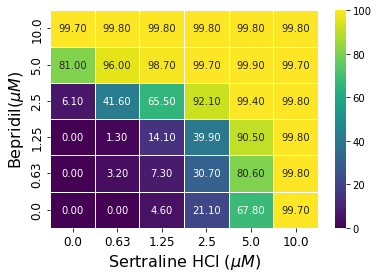

In [201]:
Data_plot = Data_df.pivot('Bep', 'Ser', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1)
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

## Model A:
#### Bepridil upstream
#### Sertraline downstream

In [70]:
Bep = Data_df.Bep.unique()
Ser = Data_df.Ser.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Ser==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Bep==0].Res/100)
Downstream_Res=[]


In [71]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [72]:
result_Bep= PDModel.fit(UpstreamRes, params, Conc=Bep)
result_Ser_Isol = PDModel.fit(Downstream_Isol, params, Conc=Ser)

In [73]:
result_Bep

In [74]:
np.sum((result_Bep.best_fit-UpstreamRes)**2)

1.2879522303519048e-06

In [225]:
for i in range(0,6):
    if i==0:
        E_B = result_Bep.best_fit
        E_S_Isol = result_Ser_Isol.best_fit
    else:
        E_B = np.vstack((E_B,result_Bep.best_fit))
        E_S_Isol = np.vstack((E_S_Isol,result_Ser_Isol.best_fit))

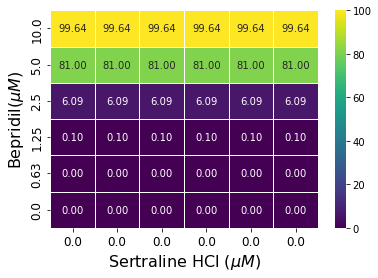

In [207]:
ax1 = sns.heatmap(E_B.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Bep, xticklabels = np.zeros(6))
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [75]:
result_Ser_Isol

In [76]:
np.sum((result_Ser_Isol.best_fit-Downstream_Isol)**2)

0.0026109590746528294

0.63
0.0019271609533829687
1.25
0.006375550130702912
2.5
0.0033038258179747177
5.0
7.749722023714871e-06
10.0
1.736617268398697e-11


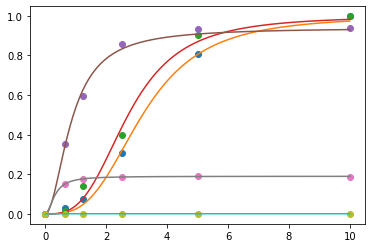

In [208]:
result_Ser=[]
IC50 =[3.211,2.723,0.8575,0.314, 0.314]
Hill = [3.158,3.126,1.916,1.895, 1.895]
i=0
Ecombo = result_Ser_Isol.best_fit
E_S = result_Ser_Isol.best_fit
for UpConc in Bep[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Bep.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Bep == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Ser == 0)&(Data_df.Bep == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Ser == UpConc].Res)/100-
   #                   PDModel.eval(result_Ser.params, Conc = UpConc))
    result_Ser.append(PDModel.fit(Downstream_Res, params, Conc=Ser))
    print(np.sum((result_Ser[-1].best_fit-Downstream_Res)**2))
    E_S = np.vstack((E_S,result_Ser[-1].best_fit))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Ser[i].params, Conc = Ser)+PDModel.eval(result_Bep.params, Conc = UpConc)))
    plt.plot(Ser, Downstream_Res, 'o')
    plt.plot(np.linspace(Ser[0],Ser[-1], 100), PDModel.eval(result_Ser[i].params, Conc = np.linspace(Ser[0],Ser[-1], 100)))
    i=i+1

In [82]:
result_Ser[4]

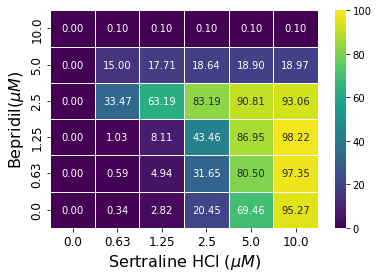

In [209]:
ax1 = sns.heatmap(E_S*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Bep, xticklabels = Ser)
ax1.invert_yaxis()
ax1.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [26]:
result_Ser[4].params['IC50'].value=1.902
result_Ser[4].params['Hill_Coeff'].value=0.314
Ecombo[-1] = PDModel.eval(result_Ser[4].params, Conc = Ser)+PDModel.eval(result_Bep.params, Conc = 10)

In [83]:
Ecombo*100

array([[0.00000000e+00, 3.35493282e-01, 2.82308298e+00, 2.04503696e+01,
        6.94648706e+01, 9.52676432e+01],
       [1.57645387e-03, 5.95121568e-01, 4.93744257e+00, 3.16485890e+01,
        8.05023070e+01, 9.73557256e+01],
       [9.86371294e-02, 1.12553808e+00, 8.20654853e+00, 4.35625479e+01,
        8.70504900e+01, 9.83222536e+01],
       [6.09315872e+00, 3.95630661e+01, 6.92873232e+01, 8.92829619e+01,
        9.68991334e+01, 9.91576037e+01],
       [8.10031922e+01, 9.60026780e+01, 9.87176823e+01, 9.96390818e+01,
        9.99020766e+01, 9.99737021e+01],
       [9.96444054e+01, 9.97441428e+01, 9.97442733e+01, 9.97444053e+01,
        9.97445374e+01, 9.97446697e+01]])

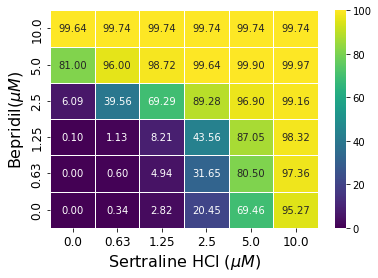

In [212]:
ax = sns.heatmap(Ecombo*100, vmin =0, vmax = 100, annot = True, fmt = '.2f', cmap ='viridis', linewidth = 1, 
                 yticklabels = Bep, xticklabels = Ser)
ax.invert_yaxis()
ax.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [85]:
Data_array= np.asarray(Data_plot)
Data_array

array([[ 0. ,  0. ,  4.6, 21.1, 67.8, 99.7],
       [ 0. ,  3.2,  7.3, 30.7, 80.6, 99.8],
       [ 0. ,  1.3, 14.1, 39.9, 90.5, 99.8],
       [ 6.1, 41.6, 65.5, 92.1, 99.4, 99.8],
       [81. , 96. , 98.7, 99.7, 99.9, 99.7],
       [99.7, 99.8, 99.8, 99.8, 99.8, 99.8]])

In [86]:
np.sum((Data_array-Ecombo*100)**2)

140.82372744233373

In [87]:
np.sum((Data_array-np.mean(Data_array))**2)

62704.91000000001

In [88]:
1-np.sum((Data_array-Ecombo*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9977541834053771

In [234]:
delta_E = Ecombo*100-np.minimum(100,(E_B.T*100+E_S_Isol*100))

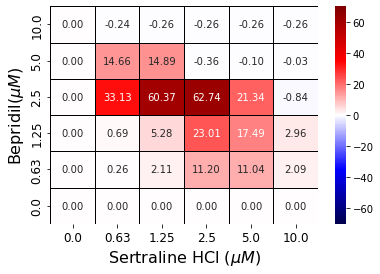

In [243]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Bep, xticklabels = Ser)
ax.invert_yaxis()
ax.set_ylabel("Bepridil($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [89]:
IC50_Ser = [3.85]
IC50_Ser_err = [0.209]
Hill_Ser = [3.146]
Hill_Ser_err = [0.379]
for i in range(0,len(Bep[1:])):
    IC50_Ser.append(result_Ser[i].params['IC50'].value)
    IC50_Ser_err.append(result_Ser[i].params['IC50'].stderr)
    Hill_Ser.append(result_Ser[i].params['Hill_Coeff'].value)
    Hill_Ser_err.append(result_Ser[i].params['Hill_Coeff'].stderr)

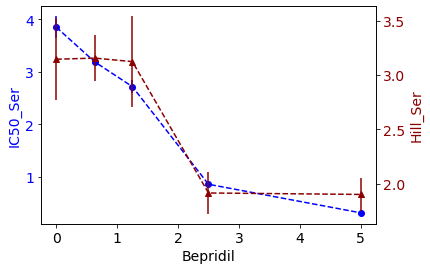

In [90]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Bep[0:5], IC50_Ser[0:5], yerr = IC50_Ser_err[0:5], fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Ser", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Bepridil', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Bep[0:5], Hill_Ser[0:5], yerr = Hill_Ser_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Ser", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

In [92]:
def exponential(x, a, b, c):
    return a*np.exp(b*x)+c

def double_exp(x, a, b, c, d, e):
    return a*np.exp(b*x)+c*np.exp(d*x)+e

def binomial(x, a, b, c, d):
    return a*x+b*x**2+c*x**3+d


def gaussian(x, a, b, c):
    return a * exp(-(x-b)**2 / c)

In [110]:
exp_model = Model(exponential)

exp_model.set_param_hint('a', value=1, min = -np.inf, max = np.inf)
exp_model.set_param_hint('b', value=-1, min=-np.inf, max=np.inf)
exp_model.set_param_hint('c', value=0, min=-np.inf, max=np.inf)
params = exp_model.make_params()


dbl_exp_model = Model(double_exp)

dbl_exp_model.set_param_hint('a', value=1, min = -np.inf, max = np.inf)
dbl_exp_model.set_param_hint('b', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('c', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('d', value=1, min=-np.inf, max=np.inf)
dbl_exp_model.set_param_hint('e', value=0, min=-np.inf, max=np.inf)

binomial_model = Model(binomial)

binomial_model.set_param_hint('a', value=1, min = -np.inf, max = np.inf)
binomial_model.set_param_hint('b', value=1, min=-np.inf, max=np.inf)
binomial_model.set_param_hint('c', value=1, min=-np.inf, max=np.inf)
binomial_model.set_param_hint('d', value=0, min=-np.inf, max=np.inf)




gaussian_model = Model(gaussian)

gaussian_model.set_param_hint('a', value=1, min = 0, max = np.inf)
gaussian_model.set_param_hint('b', value=1, min=0, max=np.inf)
gaussian_model.set_param_hint('c', value=0, min=0, max=np.inf)


In [256]:
def sigmoidal (x, a, b, c, d, e):
    return a+(b*(c-x)**d)/(e**d + (c-x)**d)

sigmoidal_model = Model(sigmoidal)

sigmoidal_model.set_param_hint('a', value=0.5, min = 0, max = np.inf)
sigmoidal_model.set_param_hint('b', value=5, min=0, max=np.inf)
sigmoidal_model.set_param_hint('c', value=5, min=0, max=np.inf, vary = False)
sigmoidal_model.set_param_hint('d', value=2, min=0, max=np.inf)
sigmoidal_model.set_param_hint('e', value=3.545, min=0, max=np.inf)
params = sigmoidal_model.make_params()

IC50_sigmoid = sigmoidal_model.fit(IC50_Ser[0:5], params, x= Bep[0:5], weights = 1.0/np.asarray(IC50_Ser_err[0:5]))

In [257]:
IC50_sigmoid

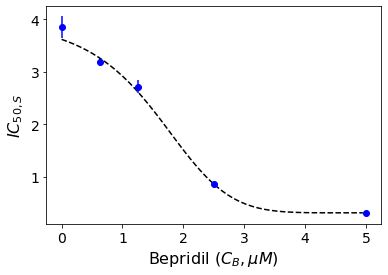

In [258]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Bep[0:5], IC50_Ser[0:5], yerr = IC50_Ser_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Bep[0], Bep[5], 100), 
         sigmoidal_model.eval(IC50_sigmoid.params, x=np.linspace(Bep[0], Bep[5], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Bepridil ($C_B, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [259]:
from sklearn.metrics import r2_score
r2_score(IC50_Ser[0:5], sigmoidal_model.eval(IC50_sigmoid.params, x=Bep[0:5]), sample_weight= 1.0/np.asarray(IC50_Ser_err[0:5]))

0.9972359835069503

In [169]:
Hill_sigmoid = sigmoidal_model.fit(Hill_Ser[0:5], params, x= Bep[0:5], weights = 1.0/np.asarray(Hill_Ser_err[0:5]))

In [170]:
Hill_sigmoid

In [251]:
from sklearn.metrics import r2_score
r2_score(Hill_Ser[0:5], sigmoidal_model.eval(Hill_sigmoid.params, x=Bep[0:5]), sample_weight= 1.0/np.asarray(Hill_Ser_err[0:5]))

0.9999691035876139

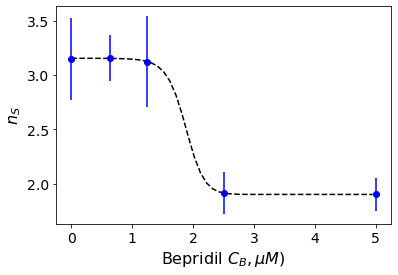

In [171]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Bep[0:5], Hill_Ser[0:5], yerr = Hill_Ser_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Bep[0], Bep[5], 100), 
         sigmoidal_model.eval(Hill_sigmoid.params, x=np.linspace(Bep[0], Bep[5], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Bepridil $C_B, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

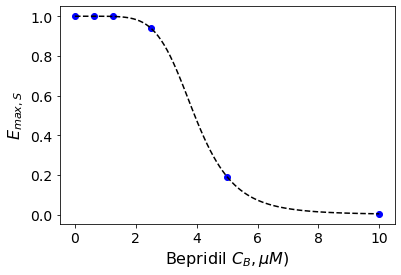

In [172]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Bep, 1-np.asarray(Data_df[(Data_df.Ser == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Bep[0], Bep[-1], 100), 
         1-PDModel.eval(result_Bep.params, Conc = np.linspace(Bep[0], Bep[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Bepridil $C_B, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [261]:
r2_score(1-np.asarray(Data_df[(Data_df.Ser == 0)].Res)/100, 1-PDModel.eval(result_Bep.params, Conc = Bep))

0.9999987988426025